# Housing Prices!

### Housing prices and the area of each house are closely related. Let's create a model using Simple Linear Regression to predict housing prices based on the area of the house.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Let's focus on our feature ("area" columnn) and the target ("price" column).

In [2]:
housing = pd.read_csv("Housing.csv")
price_and_area = housing[["price", "area"]]
price_and_area.head()

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


### Generating a Prediction!

We want to predict a housing price (the "target" Y) using the area (the "feature" X).

To make a prediction, we need to build a **model**.

A **model** is a mathematical representation that uses features (inputs) and learned parameters to generate predictions (outputs).

There are many different types of models we can use for prediction, but we will focus on implementing Simple Linear Regression.

### What is a Simple Linear Regression?

A Simple Linear Regression (SLR) is a basic model that requires two variables (a feature and a target) to create a prediction. Our goal is to find the regression line, which represents the estimated relationship between the feature and the target, that best fits our dataset.

Let's start by visualizing the data.

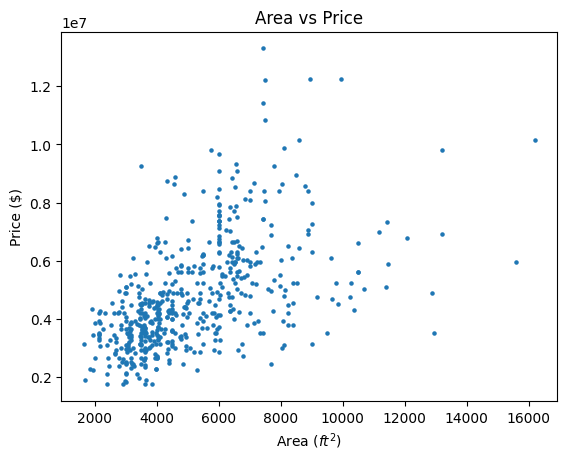

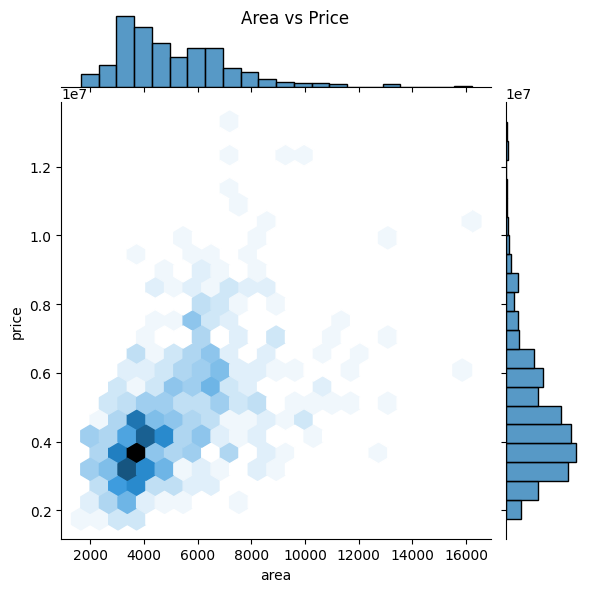

In [3]:
slr_Y = price_and_area["price"]
slr_X = price_and_area["area"]

# we can use a scatterplot to visualize area vs price (we set the size of the plot to 5 to make it more clear)
plt.scatter(slr_X, slr_Y, s=5)
plt.title("Area vs Price")
plt.xlabel("Area ($ft^2$)")
plt.ylabel("Price ($)")
plt.show()

# use a hexplot to visualize area vs price (since our data is dense, we can simply use the hexplot to visualize enclosed datapoints)
sns.jointplot(data=price_and_area, x="area", y="price", kind="hex")
plt.suptitle("Area vs Price")
plt.show()

### Modeling Process!

### 1. Define the formula of Simple Linear Regression
Now we visualized our data, let's look at our SLR's formula:
$$ \hat{y} = \theta_0 + \theta_1x $$

Explanation:
* $\hat{y}$: This is the output of the model. It's a dependent value and we call it as a "prediction" (or a "target").
* $x$: This is an input of the model. It's a independent and we call it as a "feature."
* $\theta_0$: It's an intercept term of the model. This is the place where our regression line crosses the y-axis.
* $\theta_1$ It's a slope of the model.

Note that $\theta_0$ and $\theta_1$ are our parametric models. To find most efficient parametric models, we should define a loss function that will be used in our cost function (our empirical risk).


### 2. Mean Squared Error and the Cost Function
To check our model's performance (to check our model works well or not), we should use a loss function and apply it to the cost function to check how the model performs to the entire dataset.

L2 loss:
$$ L(y_i, \hat{y_i}) = (y_i - \hat{y_i})^{2} $$
Cost Function (Empirical Risk):
$$ \hat{R}(\theta) = \frac{1}{n}\sum_{i=1}^{n}L(y_i, \hat{y_i}) = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^{2} $$

Note that our cost function is called *Mean Squared Error* (MSE).

### 3. Finding Optimized Model Parameters
Let's find our optimized model parameters.


If we use an analytical approach...

### For $\hat{\theta_0}$:

$$ \frac{\partial}{\partial\theta_0} MSE = \frac{-2}{n}\sum_{i=1}^{n}y_i - \theta_0 - \theta_1x_i $$

Set this equation equal to 0 and solve for $\theta_0$

$$ \frac{1}{n}\sum_{i=1}^{n}y_i - \theta_0 - \theta_1x_i = 0 $$

$$ (\frac{1}{n}\sum_{i=1}^{n}y_i) = (\frac{1}{n}\sum_{i=1}^{n}\theta_0) + \theta_1(\frac{1}{n}\sum_{i=1}^{n}x_i) $$

$$ \bar{y} = \theta_0 + \theta_1\bar{x} $$

Therefore,
$$ \theta_0 = \bar{y} - \theta_1\bar{x} $$


### For $\hat{\theta_1}$:

$$ \frac{\partial}{\partial\theta_1} MSE = \frac{-2}{n}\sum_{i=1}^{n}(y_i - \theta_0 - \theta_1x_i)x_i $$

This is more complicated. Multiply the $\bar{x}$ to our equation of $\theta_0$ and subtract from the equation of $\theta_1$

$$ \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})x_i - \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})\bar{x} = 0 $$


Organize them to a simpler equation

$$ \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})(x_i - \bar{x}) = 0 $$

Now we know that 
$$\hat{\theta_0} = \bar{y} - \theta_1\bar{x}$$ 

Apply this to 
$$\hat{y} = \hat{\theta_0} + \hat{\theta_1}x_i$$

We get
$$\hat{y} = \bar{y} + \hat{\theta_1}(x_i - \bar{x})$$

Now plug in to the previous equation
$$\frac{1}{n}\sum_{i=1}^{n}(y_i - \bar{y} - \hat{\theta_1}(x_i - \bar{x}))(x_i - \bar{x}) = 0 $$

Simplify again -> multiply $(x_i - \bar{x})$ to group 1: $(y_i - \bar{y})$ and group 2: $\hat{\theta_1}(x_i - \bar{x})$
$$\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y}) - \hat{\theta_1} \times \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^{2} = 0$$

Simplify again!
$$\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y}) = \hat{\theta_1} \times \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^{2}$$

Now we can use the definition of correlation and the standard deviation:
$$r = \frac{1}{n} \sum_{i=1}^n (\frac{x_i-\bar{x}}{\sigma_x})(\frac{y_i-\bar{y}}{\sigma_y}) $$
$$\sigma_x = \sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2}$$

We use these definitions to simplify again...............:)

$$r \times \sigma_x\sigma_y = \hat{\theta_1}\times\sigma_x^{2}$$

We finally got our $\hat{\theta_1}$
$$\hat{\theta_1} = r\frac{\sigma_y}{\sigma_x}$$

### 4. Evaluate the fitted model's (SLR) performance

1. We can use the Root Mean Squared Error (RMSE) to measure the model's performance (how good are the predictions?). The square root of the Mean Squared Error shares the same unint of Y. If we have a lower Root Mean Squared error, our model's prediction is accurate. Here is the Root Mean Squared Error's formula: 
$$\sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}$$

2. We also can visualize the residual plot ($e_i = y_i - \hat{y_i}$). This is a difference between the actual values and the predicted values. If our model fits well, the residual plot will not show any pattern between those values.

### Evaluate *without* using a scikit-learn

### Explanation:

`convert_to_standard_units`
- This function converts original units to standard units. Standard units' 0 is the mean of the original variable's units. 1 standard units is equal to 1 standard deviation from the original units

- calculation: 
    1. subtract x with mean of x (x-bar)
    2. divide by the standard deviation of x (sigma-x)


`correlation`
- This function returns the correlation of two variables (x, y). A correlation represents the linear relationship between two variables. The range of correlation is [-1, 1] where |r| <= 1 (denote correlation 'r').
    - If r = 1 -> perfect positive linear association
    - If r = -1 -> perfect negative association
    - If r is close to 0 -> the linear relationship of two variables is weak or non-existant.
    - If r = 0 -> two variables are 'uncorrelated'.

- calculation:
    1. multiply x and y (they are in standard units)
    2. evaluate the mean of the product of x and y

`slope`
- This function returns the slope of two variables (x, y).

to be continued...


In [4]:
def convert_to_standard_units(x): 
    return (x - np.mean(x)) / np.std(x)

def correlation(x, y):
    return np.mean(convert_to_standard_units(x) * convert_to_standard_units(y))

def slope(x, y):
    return correlation(x, y) * np.std(y) / np.std(x)

def intercept(x, y):
    return np.mean(y) - slope(x, y) * np.mean(x)